<a href="https://colab.research.google.com/github/BRkavin/Creditcard-fraud-detection/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


**Loding dataset**

In [ ]:
dataframe = pd.read_csv("creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**check null values**

In [ ]:
dataframe.isnull().values.any()


False

**removing row with null values using dropna() function**

In [ ]:
newdf = dataframe.dropna()

**recheck it contains null values ot not**

In [ ]:
newdf.isnull().values.any()

False

**detailed feature of amount**

In [ ]:
newdf["Amount"].describe()

count    41682.000000
mean        89.104007
std        237.163503
min          0.000000
25%          7.500000
50%         24.000000
75%         80.000000
max       7879.420000
Name: Amount, dtype: float64

**find number of genuine and fraud transactions**

In [ ]:
non_fraud = len(newdf[newdf.Class == 0])
fraud = len(newdf[newdf.Class == 1])
fraud_percent = (int(fraud) / (int(fraud) + int(non_fraud))) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  41574
Number of Fraud transactions:  108
Percentage of Fraud transactions: 0.2591


**class imbalance visualization**

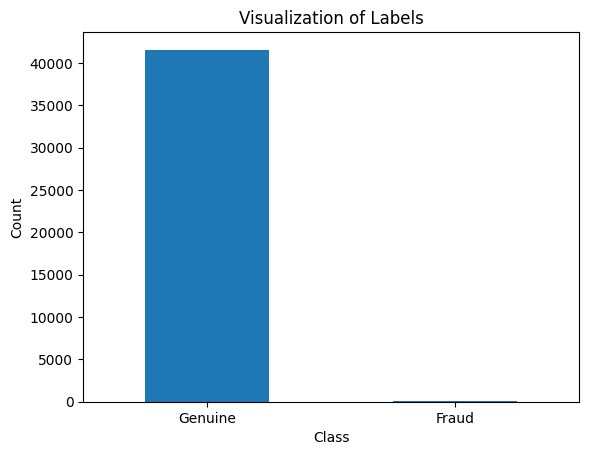

In [ ]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

**scaling techniques**

In [ ]:
scaler = StandardScaler()
newdf["NormalizedAmount"] = scaler.fit_transform(newdf["Amount"].values.reshape(-1,1))
newdf.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = newdf["Class"]
X = newdf.drop(["Class"], axis= 1)

<ipython-input-41-80120bb8a5c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf["NormalizedAmount"] = scaler.fit_transform(newdf["Amount"].values.reshape(-1,1))
<ipython-input-41-80120bb8a5c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop(["Amount", "Time"], inplace= True, axis= 1)


**split and train dataset**

In [ ]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (29177, 29)
Shape of test_X:  (12505, 29)


**intialize the classification model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

#Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

**logistic regression prediction**

In [ ]:
log.fit(train_X, train_Y)
predictions_lr = log.predict(test_X)
logistic_score = log.score(test_X, test_Y) * 100

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**decision tree prediction**

In [ ]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100



**random forest prediction**

In [ ]:
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

**model score**

In [ ]:
print("logistic Score: ",logistic_score)
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

logistic Score:  99.8640543782487
Random Forest Score:  99.92003198720512
Decision Tree Score:  99.90403838464614


In [ ]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

**Confusion matrix logistic regression**

In [ ]:
confusion_matrix_lr = confusion_matrix(test_Y, predictions_lr.round())
print("Confusion Matrix - Logistic regression")
print(confusion_matrix_lr)

Confusion Matrix - Logistic regression
[[12466     2]
 [   15    22]]


**ConfusionMatrixDisplay logistic regression**

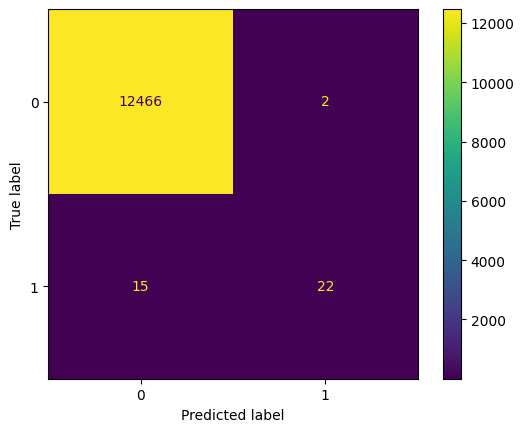

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix_lr,
                               display_labels=[0,1])
disp.plot()
plt.show()

**Evaluation metrics for logistic regression**

In [ ]:
print("Evaluation of Logistic regression Model")
print()
ACC1=accuracy_score(test_Y, predictions_lr.round())
PER1=precision_score(test_Y, predictions_lr.round())
RECALL1=recall_score(test_Y, predictions_lr.round())
F1SCORE1=f1_score(test_Y, predictions_lr.round())
print(ACC1)
print(PER1)
print(RECALL1)
print(F1SCORE1)

Evaluation of Logistic regression Model

0.998640543782487
0.9166666666666666
0.5945945945945946
0.7213114754098361


**confusion matrix decision tree**

In [ ]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[12464     4]
 [    8    29]]


**ConfusionMatrixDisplay decision tree**

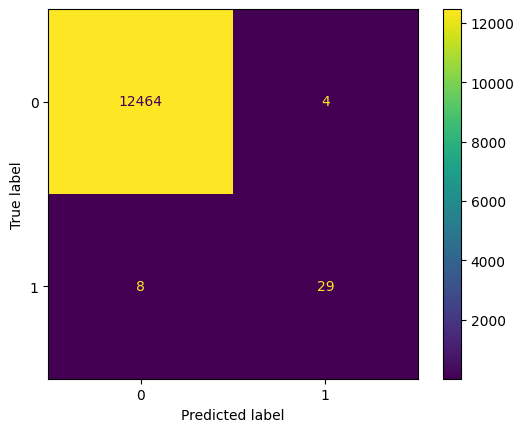

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix_dt,
                               display_labels=[0,1])
disp.plot()
plt.show()

**Evaluation metrics decision tree**

In [ ]:
print("Evaluation of Decision Tree Model")
print()
ACC2=accuracy_score(test_Y, predictions_dt.round())
PER2=precision_score(test_Y, predictions_dt.round())
RECALL2=recall_score(test_Y, predictions_dt.round())
F1SCORE2=f1_score(test_Y, predictions_dt.round())
print(ACC2)
print(PER2)
print(RECALL2)
print(F1SCORE2)
#metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

0.9990403838464614
0.8787878787878788
0.7837837837837838
0.8285714285714285


**confusion matrix random forest**

In [ ]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[12466     2]
 [    8    29]]


**ConfusionMatrixDisplay random forest**

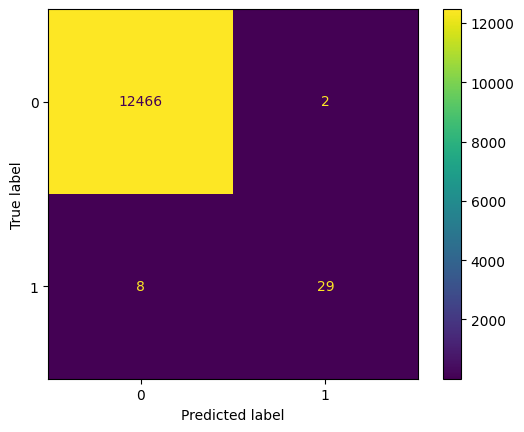

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix_rf,
                               display_labels=[0,1])
disp.plot()
plt.show()

**Evaluation metrics random forest**

In [ ]:
print("Evaluation of random forest Model")
print()
ACC3=accuracy_score(test_Y, predictions_rf.round())
PER3=precision_score(test_Y, predictions_rf.round())
RECALL3=recall_score(test_Y, predictions_rf.round())
F1SCORE3=f1_score(test_Y, predictions_rf.round())
print(ACC3)
print(PER3)
print(RECALL3)
print(F1SCORE3)
#metrics(test_Y, predictions_rf.round())

Evaluation of random forest Model

0.9992003198720512
0.9354838709677419
0.7837837837837838
0.8529411764705881


**perform over sampling on random forest**

In [ ]:
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)


(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (83148, 29)
Resampled shape of Y:  (83148,)
Counter({0.0: 41574, 1.0: 41574})


**resampled random forest score**

In [ ]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100
print(random_forest_score_resampled)

99.98396472238925


**over sampled confusion matrix for random forest**

Confusion Matrix - Random Forest
[[12519     5]
 [    0 12421]]


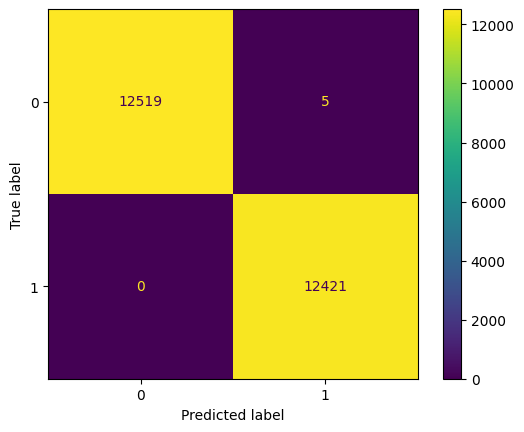

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
cm_resampled = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - over sampled Random Forest")
print(cm_resampled)

disp = ConfusionMatrixDisplay(cm_resampled, display_labels=[0,1])
disp.plot()
plt.show()

**Evaluation metrics for over sampled random forest model**

In [ ]:
print("Evaluation of Random Forest Model")
print()

metrics(test_Y, predictions_resampled.round())
resampledf1=f1_score(test_Y, predictions_resampled.round())
print()
f1score=resampledf1.round(5)
print("f1_score:",f1score)

Evaluation of Random Forest Model

Accuracy: 0.99984
Precision: 0.99968
Recall: 1.00000
F1-score: 0.99984

f1_score: 0.99984


**Comparison of Classification Models**




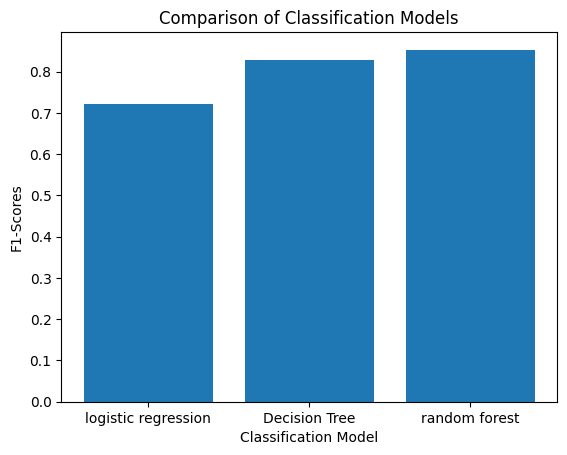

In [ ]:
import matplotlib.pyplot as plt

# define the data
x_values = ['logistic regression', 'Decision Tree', 'random forest']
y_values = [F1SCORE1, F1SCORE2,F1SCORE3]

# create the bar graph
plt.bar(x_values, y_values)

# add labels and titles
plt.xlabel('Classification Model')
plt.ylabel('F1-Scores')
plt.title('Comparison of Classification Models')

# display the graph
plt.show()

**Comparison of Classification Models after oversampling**

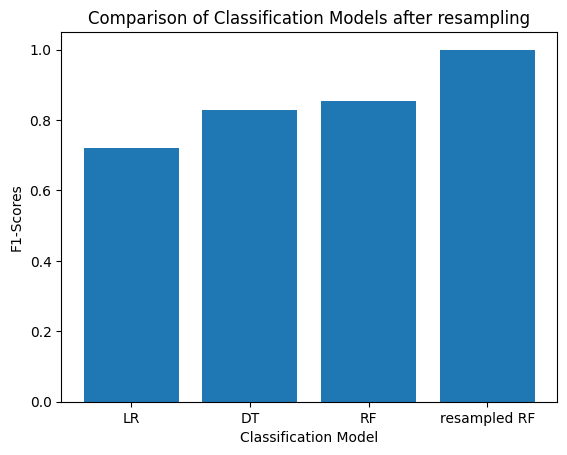

In [ ]:
import matplotlib.pyplot as plt

# define the data
x_values = ['LR', 'DT', 'RF','resampled RF']
y_values = [F1SCORE1, F1SCORE2,F1SCORE3,f1score]

# create the bar graph
plt.bar(x_values, y_values)

# add labels and titles
plt.xlabel('Classification Model')
plt.ylabel('F1-Scores')
plt.title('Comparison of Classification Models after resampling')

# display the graph
plt.show()

   **In this python machine learning project, we built a binary classifier    using the Random Forest algorithm to detect credit card fraud transactions. Through this project, we understood and applied techniques to address the class imbalance issues and achieved an accuracy of more than 99%.**